# Settup

In [ ]:
!git clone https://github.com/huggingface/diffusers
%cd diffusers
!pip install .

%cd examples/textual_inversion
!pip install -r requirements.txt

!pip install --upgrade xformers \
    --index-url https://download.pytorch.org/whl/cu124

!pip install torch==2.6.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124_full --force-reinstall
#!pip install torch==2.6.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/test/cu124_full --force-reinstall

Cloning into 'diffusers'...
remote: Enumerating objects: 82245, done.
remote: Counting objects: 100% (594/594), done.
remote: Compressing objects: 100% (341/341), done.
remote: Total 82245 (delta 463), reused 270 (delta 243), pack-reused 81651 (from 4)
Receiving objects: 100% (82245/82245), 60.09 MiB | 26.50 MiB/s, done.
Resolving deltas: 100% (60214/60214), done.
/content/diffusers
Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.33.0.dev0-py3-none-any.whl size=3351627 sha256=dafebdcd8c5eaafc8d2439fe390560f361c8315aeeb58751be9d388bf61cfb81
  Stored in directory: /tmp/pip-ephem-wheel-cache-yyk9t9ok/wheels/30/15/ca/ab6e88c89d6ba7047b3f155894c6c346e7cf06067fd132ae62
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.32.2
    Uninstalling diffusers-0.32.2:
      Succe

In [ ]:
!git clone https://github.com/hectorcarrion/ControllableGenDDI.git

Cloning into 'miccai-2025'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 42 (delta 18), reused 38 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 163.45 KiB | 6.81 MiB/s, done.
Resolving deltas: 100% (18/18), done.


# Train TI

In [ ]:
# replace with your own HF token here
hf_token = userdata.get('hf_token')
!huggingface-cli login --token {hf_token}

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
The token `colab` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `colab`


In [ ]:
!bash train_ti.bash

Streaming output truncated to the last 5000 lines.
diffusion_pytorch_model.safetensors:  46% 801M/1.73G [00:34<00:43, 21.3MB/s]


model.safetensors:  66% 901M/1.36G [00:35<00:12, 37.9MB/s]





model.safetensors:  78% 1.06G/1.36G [00:36<00:07, 38.4MB/s]



diffusion_pytorch_model.safetensors:  47% 809M/1.73G [00:34<00:33, 27.2MB/s]


model.safetensors:  67% 907M/1.36G [00:35<00:11, 40.1MB/s]





model.safetensors:  78% 1.06G/1.36G [00:36<00:07, 40.2MB/s]



diffusion_pytorch_model.safetensors:  47% 814M/1.73G [00:35<00:30, 30.0MB/s]





model.safetensors:  78% 1.07G/1.36G [00:36<00:06, 41.9MB/s]


model.safetensors:  67% 912M/1.36G [00:35<00:14, 30.5MB/s]



diffusion_pytorch_model.safetensors:  47% 818M/1.73G [00:35<00:37, 24.5MB/s]


model.safetensors:  68% 924M/1.36G [00:35<00:09, 45.0MB/s]





model.safetensors:  79% 1.07G/1.36G [00:36<00:08, 33.1MB/s]



diffusion_pytorch_model.safetensors:  48% 825M/1.73G [00:35<00:32, 28.0MB/s]





model.safetensors:  79% 1.08G/1.36G [00:37<

# Inference TI

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Use the same base model as used during training.
base_model = "stabilityai/stable-diffusion-2-1-base"
pipeline = StableDiffusionPipeline.from_pretrained(base_model, torch_dtype=torch.float16).to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# Load the textual inversion embeddings from your output directory.
# Update this path to the folder where your learned embeddings are stored.
pipeline.load_textual_inversion(".")

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


  0%|          | 0/50 [00:00<?, ?it/s]

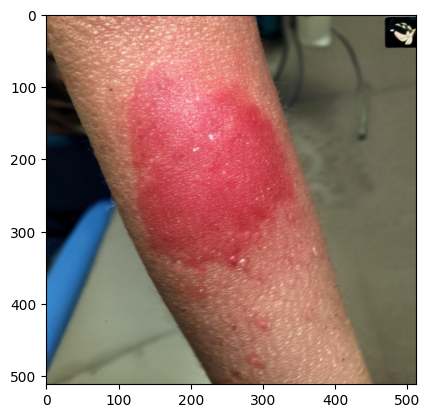

In [ ]:
prompt = "A high-quality image of a <cut-class> lesion on light skin"
image = pipeline(prompt, num_inference_steps=50).images[0]
plt.imshow(image)

  0%|          | 0/50 [00:00<?, ?it/s]

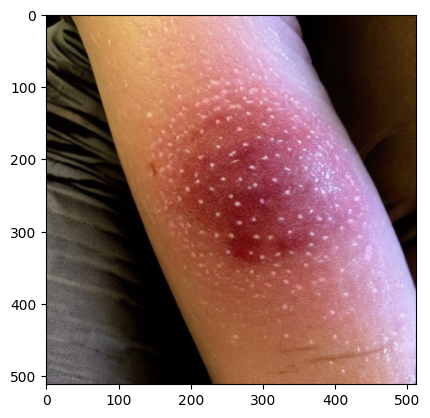

In [ ]:
prompt = "A high-quality image of a <cut-class> lesion on medium skin"
image = pipeline(prompt, num_inference_steps=50).images[0]
plt.imshow(image)

  0%|          | 0/50 [00:00<?, ?it/s]

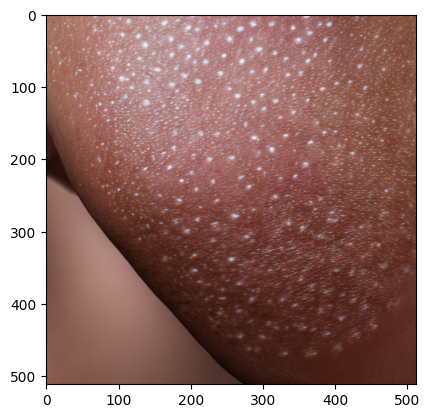

In [ ]:
prompt = "A high-quality image of a <acn-class> lesion on dark skin"
image = pipeline(prompt, num_inference_steps=50).images[0]
plt.imshow(image)

  0%|          | 0/50 [00:00<?, ?it/s]

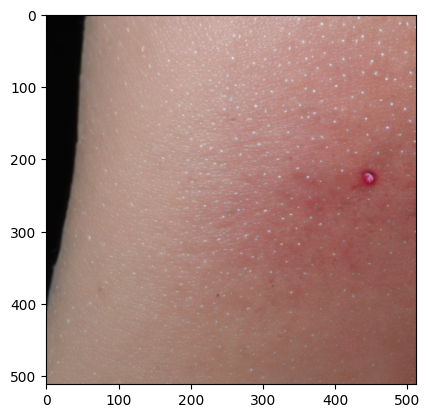

In [ ]:
prompt = "A high-quality image of a <acn-class> lesion on light skin"
image = pipeline(prompt, num_inference_steps=50).images[0]
plt.imshow(image)

  0%|          | 0/50 [00:00<?, ?it/s]

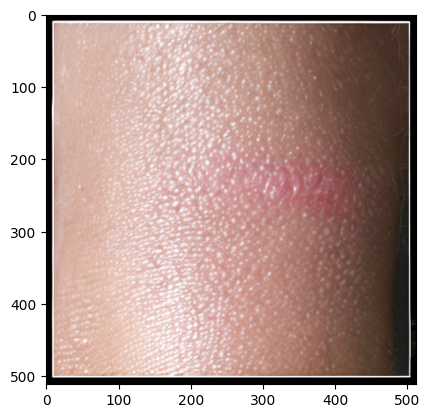

In [ ]:
prompt = "A high-quality image of a <acn-class> lesion on medium-skinned individual"
image = pipeline(prompt, num_inference_steps=50).images[0]
plt.imshow(image)

# Train LoRA